In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('train_edited.csv')

In [3]:
df.head()

,Unnamed: 0,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,0,8,3,3,3,3,1,3,6,2.0,31397,7.0,2,3,2,55.5,4911.0
1,1,2,3,5,3,2,1,4,6,2.0,31397,7.0,3,3,2,55.5,5954.0
2,2,10,5,1,1,2,2,4,5,2.0,31397,7.0,3,3,2,55.5,4745.0
3,3,26,2,2,2,2,1,3,4,2.0,31397,7.0,3,3,2,55.5,7272.0
4,4,26,2,2,2,2,1,4,4,2.0,31397,7.0,3,3,2,55.5,5558.0


In [4]:
df.describe()

,Unnamed: 0,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,159218.500000,18.318841,2.256841,4.771717,1.778098,3.197627,2.765439,2.571028,4.286913,2.625940,65747.579472,7.262506,2.325841,1.908463,3.284099,50.106781,4880.749392
std,91925.276847,8.633755,1.535712,3.102535,0.752527,1.168171,0.664438,1.195204,1.688050,0.873019,37979.936440,4.712210,0.724078,0.662886,1.764061,58.450562,1086.776254
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.500000,1800.000000
25%,79609.250000,11.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,3.000000,2.000000,32847.000000,4.000000,2.000000,1.000000,2.000000,35.500000,4186.000000
50%,159218.500000,19.000000,2.000000,5.000000,2.000000,3.000000,3.000000,3.000000,5.000000,3.000000,65724.500000,8.000000,2.000000,2.000000,3.000000,45.500000,4741.000000
75%,238827.750000,26.000000,3.000000,7.000000,2.000000,4.000000,3.000000,3.000000,6.000000,3.000000,98470.000000,8.000000,3.000000,2.000000,4.000000,55.500000,5409.000000
max,318437.000000,32.000000,7.000000,13.000000,3.000000,24.000000,5.000000,6.000000,6.000000,4.000000,131624.000000,38.000000,3.000000,3.000000,32.000000,914.500000,11008.000000


In [5]:
df.corr()

,Unnamed: 0,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
Unnamed: 0,1.000000,-0.043023,0.001877,-0.011352,0.006262,0.042580,0.023430,-0.030094,-0.011546,0.013691,-0.004150,0.065207,-0.138287,-0.151218,0.001309,-0.041455,-0.045972
Hospital_code,-0.043023,1.000000,0.039449,0.128294,-0.135920,-0.059638,-0.008027,0.195506,-0.132347,-0.013948,0.002291,-0.015477,0.004417,0.030949,-0.028500,0.007002,0.045446
Hospital_type_code,0.001877,0.039449,1.000000,-0.000839,0.268962,-0.103044,0.031020,0.211400,-0.265768,0.018642,-0.003010,0.055272,0.010012,0.006894,-0.045213,0.001849,0.025341
City_Code_Hospital,-0.011352,0.128294,-0.000839,1.000000,0.008311,-0.045771,0.015057,0.129707,-0.100474,-0.049248,0.000750,-0.024161,-0.032415,0.026350,0.018184,0.001946,-0.034455
Hospital_region_code,0.006262,-0.135920,0.268962,0.008311,1.000000,-0.006906,0.017859,0.058559,-0.507350,-0.042680,-0.002083,0.150714,-0.058217,0.029454,-0.019485,-0.003548,0.075092
Available Extra Rooms in Hospital,0.042580,-0.059638,-0.103044,-0.045771,-0.006906,1.000000,0.072638,-0.396340,0.050453,-0.115804,0.000921,-0.009462,-0.041737,-0.003307,0.096714,-0.052398,-0.143739
Department,0.023430,-0.008027,0.031020,0.015057,0.017859,0.072638,1.000000,-0.021908,-0.009210,-0.054986,-0.004353,-0.006636,-0.030816,-0.018254,0.005892,-0.061612,-0.055692
Ward_Type,-0.030094,0.195506,0.211400,0.129707,0.058559,-0.396340,-0.021908,1.000000,-0.129028,-0.006296,0.001257,0.005576,-0.001879,-0.007936,-0.090885,0.011828,0.056740
Ward_Facility_Code,-0.011546,-0.132347,-0.265768,-0.100474,-0.507350,0.050453,-0.009210,-0.129028,1.000000,0.075984,0.001923,-0.139691,0.066908,-0.036152,0.022088,0.000276,-0.023057
Bed Grade,0.013691,-0.013948,0.018642,-0.049248,-0.042680,-0.115804,-0.054986,-0.006296,0.075984,1.000000,0.001638,-0.007581,0.049850,-0.284407,0.088920,-0.001370,0.073779


Text(0, 0.5, '')

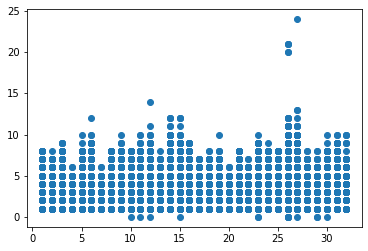

In [6]:
x = df['Hospital_code']
y = df['Available Extra Rooms in Hospital']
plt.scatter(x,y)
'''plt.plot(x,y)'''
plt.xlabel('')
plt.ylabel('')

In [7]:
corrilation = x.corr(y)
corrilation

-0.05963837121268352

(318438,)

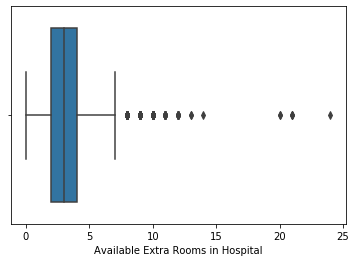

In [8]:
#sns.boxplot(df['Hospital_code'])
sns.boxplot(df['Available Extra Rooms in Hospital'])
df['Available Extra Rooms in Hospital'].shape

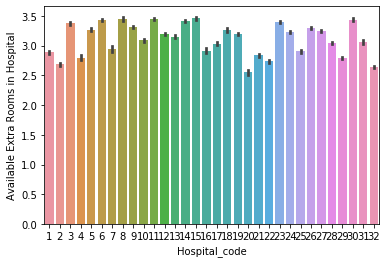

In [9]:
sns.barplot(df['Hospital_code'],df['Available Extra Rooms in Hospital'])

In [10]:
df['Available Extra Rooms in Hospital'] = df['Available Extra Rooms in Hospital'].round(0).astype(int)

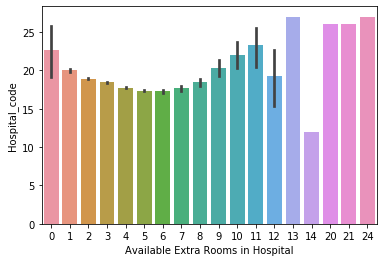

In [11]:
sns.barplot(df['Available Extra Rooms in Hospital'],df['Hospital_code'])

In [12]:
df['Available Extra Rooms in Hospital'].dtypes

dtype('int32')

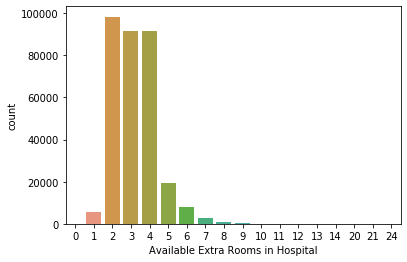

In [13]:
sns.countplot(df['Available Extra Rooms in Hospital'])

In [14]:
print(df['Available Extra Rooms in Hospital'].quantile(0.25)) 
print(df['Available Extra Rooms in Hospital'].quantile(.99)) 
df['Available Extra Rooms in Hospital'] = np.where(df['Available Extra Rooms in Hospital'] >= 10, 4, df['Available Extra Rooms in Hospital'])
#df['Available Extra Rooms in Hospital'] = np.where(df['Available Extra Rooms in Hospital'] >= 8, 4, df['Available Extra Rooms in Hospital'])

#df['Available Extra Rooms in Hospital'].describe()

2.0
7.0


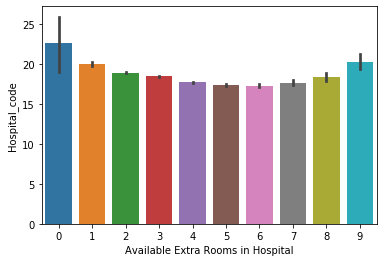

In [15]:
sns.barplot(df['Available Extra Rooms in Hospital'],df['Hospital_code'])

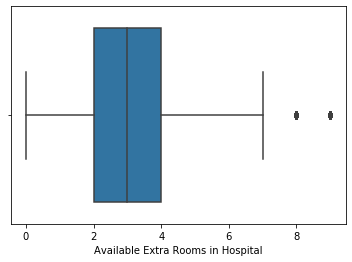

In [16]:
sns.boxplot(df['Available Extra Rooms in Hospital'])

In [17]:
df['Available Extra Rooms in Hospital'].shape

(318438,)

In [18]:
df['Available Extra Rooms in Hospital'].max()

9

In [19]:
df['Available Extra Rooms in Hospital'].mean()

3.1952530790923195

In [20]:
df['Available Extra Rooms in Hospital'].median()

3.0

In [21]:
df['Available Extra Rooms in Hospital'].std()

1.1582730407088369

In [22]:
5*df['Available Extra Rooms in Hospital'].std()

5.791365203544184

In [23]:
'''imputer = KNNImputer(n_neighbors= 1)
impute_with_1 = imputer.fit_transform(X)
'''

'imputer = KNNImputer(n_neighbors= 1)\nimpute_with_1 = imputer.fit_transform(X)\n'

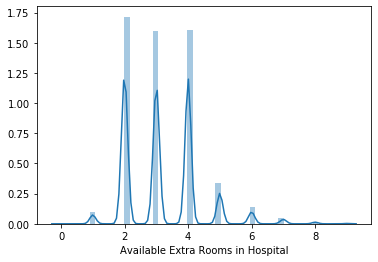

In [24]:
sns.distplot(df['Available Extra Rooms in Hospital'])

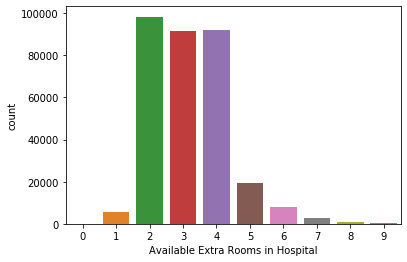

In [25]:
sns.countplot(df['Available Extra Rooms in Hospital'])

In [26]:
test = pd.read_csv('testcsv1.csv')
test1 = test

In [27]:
test['City_Code_Patient'].mean()

7.243995552261181

In [28]:
test['Available Extra Rooms in Hospital'].count()

137057

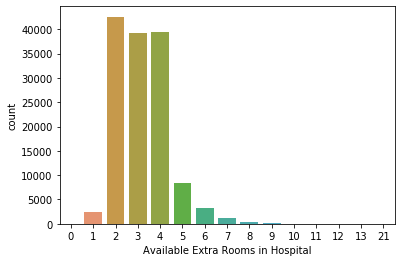

In [29]:
sns.countplot(test['Available Extra Rooms in Hospital'])

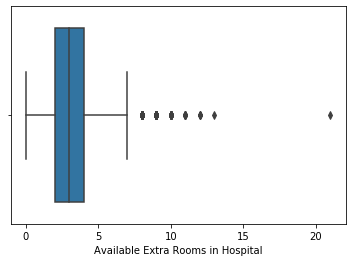

In [30]:
sns.boxplot(test['Available Extra Rooms in Hospital'])

In [31]:
arr = []
df1 = test['Available Extra Rooms in Hospital'] < 21
for i in df1:
    if (i == True):
        arr.append(i)
        
len(arr)
        
    
        

137056

In [32]:
df1

0         True
1         True
2         True
3         True
4         True
          ... 
137052    True
137053    True
137054    True
137055    True
137056    True
Name: Available Extra Rooms in Hospital, Length: 137057, dtype: bool

In [33]:
test['Available Extra Rooms in Hospital'].mean()

3.1926862546239887

In [34]:
test['Available Extra Rooms in Hospital'] = np.where(test['Available Extra Rooms in Hospital'] >= 10, 4, test['Available Extra Rooms in Hospital'])


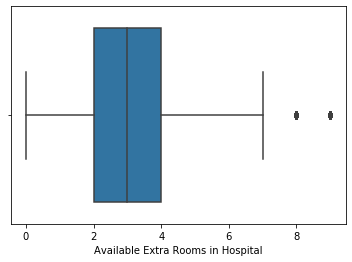

In [35]:
sns.boxplot(test['Available Extra Rooms in Hospital'])

In [36]:
test['Available Extra Rooms in Hospital'].mean()

3.1909424545991816

In [37]:
test['Available Extra Rooms in Hospital'].count()

137057

In [38]:
df['Age'] = df['Age'].astype(int)

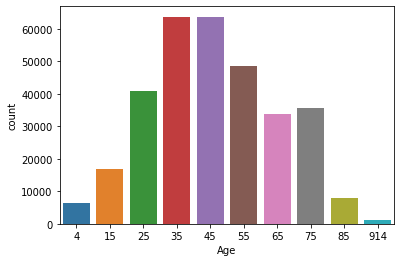

In [39]:
sns.countplot(df['Age'])

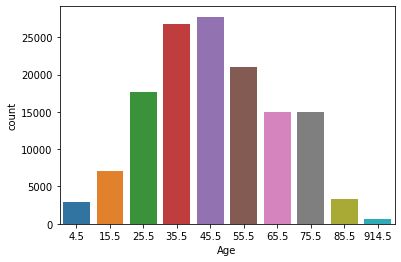

In [40]:
sns.countplot(test['Age'])

In [41]:
'''def change_Age():
    global df
    df['Age'] = df['Age'].max().fillna(df1['Age'].mean(), inplace=True)'''

"def change_Age():\n    global df\n    df['Age'] = df['Age'].max().fillna(df1['Age'].mean(), inplace=True)"

In [42]:
df['Age'] = df['Age'].replace(914,95)

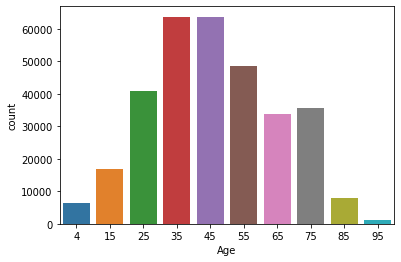

In [43]:
sns.countplot(df['Age'])

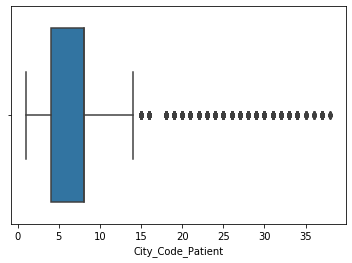

In [44]:
sns.boxplot(df['City_Code_Patient'])

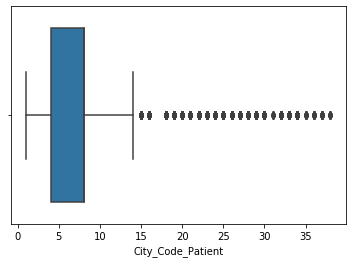

In [45]:
sns.boxplot(test['City_Code_Patient'])

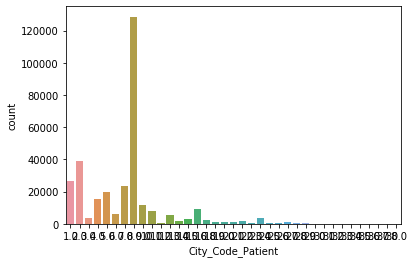

In [46]:
sns.countplot(df['City_Code_Patient'])

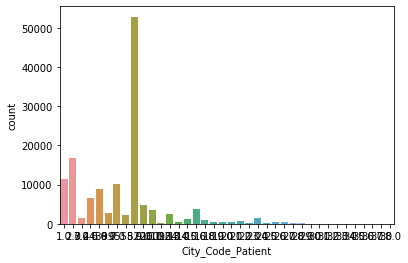

In [47]:
sns.countplot(test['City_Code_Patient'])

In [48]:
test['City_Code_Patient'].isnull().sum()

0

In [49]:
def CCP_null():
    global test
    test['City_Code_Patient'].fillna(test['City_Code_Patient'].mean(), inplace=True)

In [50]:
CCP_null()

In [51]:
test['City_Code_Patient'].isnull().sum()

0

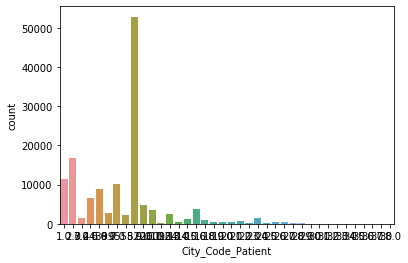

In [52]:
sns.countplot(test['City_Code_Patient'])

In [53]:
test['City_Code_Patient'].dtypes

dtype('float64')

In [54]:
test['City_Code_Patient'] = test['City_Code_Patient'].round(0).astype(int)

In [55]:
test['City_Code_Patient'].mean()

7.240155555717694

In [56]:
df['Visitors with Patient'].max()

32

In [57]:
test['Visitors with Patient'].max()

32

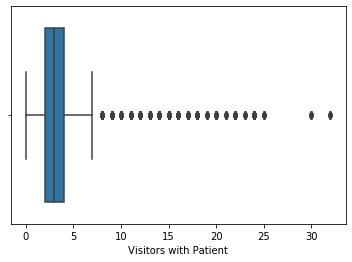

In [58]:
sns.boxplot(df['Visitors with Patient'])

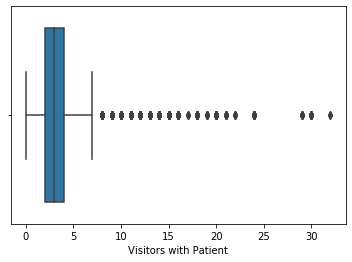

In [59]:
sns.boxplot(test['Visitors with Patient'])

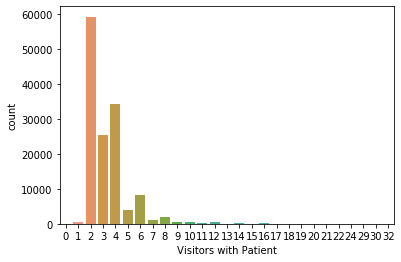

In [60]:
sns.countplot(test['Visitors with Patient'])

In [61]:
test['Visitors with Patient'] = np.where(test['Visitors with Patient'] >= 13, 4, test['Visitors with Patient'])


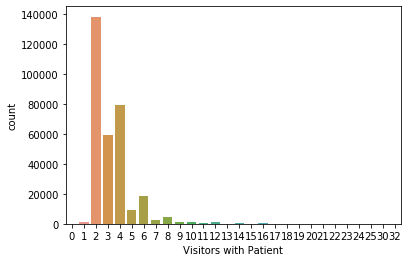

In [62]:
sns.countplot(df['Visitors with Patient'])

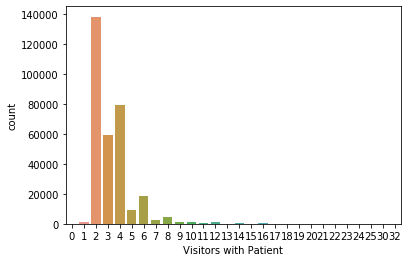

In [63]:
sns.countplot(df['Visitors with Patient'])

In [64]:
df['Visitors with Patient'] = np.where(df['Visitors with Patient'] >= 13, 4, df['Visitors with Patient'])


In [65]:
df['Visitors with Patient'].mean()

3.240470672469994

In [66]:
df.describe()

,Unnamed: 0,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,159218.500000,18.318841,2.256841,4.771717,1.778098,3.195253,2.765439,2.571028,4.286913,2.625940,65747.579472,7.262506,2.325841,1.908463,3.240471,46.258129,4880.749392
std,91925.276847,8.633755,1.535712,3.102535,0.752527,1.158273,0.664438,1.195204,1.688050,0.873019,37979.936440,4.712210,0.724078,0.662886,1.565097,18.939035,1086.776254
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,1800.000000
25%,79609.250000,11.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,3.000000,2.000000,32847.000000,4.000000,2.000000,1.000000,2.000000,35.000000,4186.000000
50%,159218.500000,19.000000,2.000000,5.000000,2.000000,3.000000,3.000000,3.000000,5.000000,3.000000,65724.500000,8.000000,2.000000,2.000000,3.000000,45.000000,4741.000000
75%,238827.750000,26.000000,3.000000,7.000000,2.000000,4.000000,3.000000,3.000000,6.000000,3.000000,98470.000000,8.000000,3.000000,2.000000,4.000000,55.000000,5409.000000
max,318437.000000,32.000000,7.000000,13.000000,3.000000,9.000000,5.000000,6.000000,6.000000,4.000000,131624.000000,38.000000,3.000000,3.000000,12.000000,95.000000,11008.000000


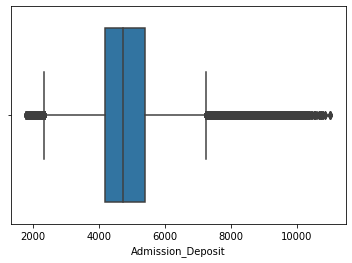

In [67]:
sns.boxplot(df['Admission_Deposit'])

In [68]:
df.corr()

,Unnamed: 0,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
Unnamed: 0,1.000000,-0.043023,0.001877,-0.011352,0.006262,0.042971,0.023430,-0.030094,-0.011546,0.013691,-0.004150,0.065207,-0.138287,-0.151218,0.001610,-0.115008,-0.045972
Hospital_code,-0.043023,1.000000,0.039449,0.128294,-0.135920,-0.061111,-0.008027,0.195506,-0.132347,-0.013948,0.002291,-0.015477,0.004417,0.030949,-0.032790,0.016341,0.045446
Hospital_type_code,0.001877,0.039449,1.000000,-0.000839,0.268962,-0.103331,0.031020,0.211400,-0.265768,0.018642,-0.003010,0.055272,0.010012,0.006894,-0.046404,0.006008,0.025341
City_Code_Hospital,-0.011352,0.128294,-0.000839,1.000000,0.008311,-0.045448,0.015057,0.129707,-0.100474,-0.049248,0.000750,-0.024161,-0.032415,0.026350,0.020910,0.020484,-0.034455
Hospital_region_code,0.006262,-0.135920,0.268962,0.008311,1.000000,-0.007408,0.017859,0.058559,-0.507350,-0.042680,-0.002083,0.150714,-0.058217,0.029454,-0.018069,-0.017071,0.075092
Available Extra Rooms in Hospital,0.042971,-0.061111,-0.103331,-0.045448,-0.007408,1.000000,0.073645,-0.399013,0.051277,-0.117187,0.001275,-0.009913,-0.042025,-0.003970,0.111724,-0.134707,-0.144105
Department,0.023430,-0.008027,0.031020,0.015057,0.017859,0.073645,1.000000,-0.021908,-0.009210,-0.054986,-0.004353,-0.006636,-0.030816,-0.018254,0.015671,-0.099280,-0.055692
Ward_Type,-0.030094,0.195506,0.211400,0.129707,0.058559,-0.399013,-0.021908,1.000000,-0.129028,-0.006296,0.001257,0.005576,-0.001879,-0.007936,-0.100932,0.023718,0.056740
Ward_Facility_Code,-0.011546,-0.132347,-0.265768,-0.100474,-0.507350,0.051277,-0.009210,-0.129028,1.000000,0.075984,0.001923,-0.139691,0.066908,-0.036152,0.021553,-0.000390,-0.023057
Bed Grade,0.013691,-0.013948,0.018642,-0.049248,-0.042680,-0.117187,-0.054986,-0.006296,0.075984,1.000000,0.001638,-0.007581,0.049850,-0.284407,0.077781,0.001523,0.073779


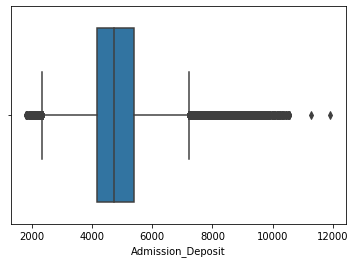

In [69]:
sns.boxplot(test['Admission_Deposit'])

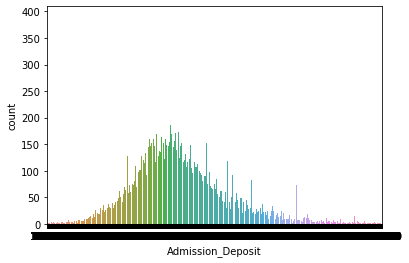

In [70]:
sns.countplot(df['Admission_Deposit'])

In [71]:
test['Admission_Deposit'].max()

11920.0

In [72]:
df['Admission_Deposit'].max()

11008.0

In [73]:
tf = pd.read_csv('train.csv')
tf.count()

case_id                              318438
Hospital_code                        318438
Hospital_type_code                   318438
City_Code_Hospital                   318438
Hospital_region_code                 318438
Available Extra Rooms in Hospital    318438
Department                           318438
Ward_Type                            318438
Ward_Facility_Code                   318438
Bed Grade                            318325
patientid                            318438
City_Code_Patient                    313906
Type of Admission                    318438
Severity of Illness                  318438
Visitors with Patient                318438
Age                                  318438
Admission_Deposit                    318438
Stay                                 318438
dtype: int64

In [74]:
target = tf['Stay']

In [75]:
test['patientid'].duplicated()

0         False
1          True
2          True
3          True
4          True
          ...  
137052    False
137053    False
137054    False
137055    False
137056    False
Name: patientid, Length: 137057, dtype: bool

In [76]:
df['patientid'].duplicated().head()

0    False
1     True
2     True
3     True
4     True
Name: patientid, dtype: bool

In [77]:
df = df.drop(['patientid', 'Unnamed: 0','Bed Grade'], axis = 1)

In [78]:
test = test.drop(['patientid', 'Bed Grade'], axis = 1)

In [79]:
test = test.drop(['Unnamed: 0'], axis = 1)

In [80]:
test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,21,3,3,3,3,3,4,1,2,2,2,2,75.5,3095.0
1,29,1,4,1,2,3,4,6,2,3,2,4,75.5,4018.0
2,26,2,2,2,3,3,1,4,2,2,2,3,75.5,4492.0
3,6,1,6,1,3,3,1,6,2,3,2,3,75.5,4173.0
4,28,2,11,1,2,3,3,6,2,3,2,4,75.5,4161.0


In [81]:
maneesh = XGBClassifier()

In [82]:
maneesh.fit(df, target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
maneesh.predict(test)

array(['0-10', '51-60', '21-30', ..., '21-30', '11-20', '51-60'],
      dtype=object)

In [84]:
column_names = ["case_id", "Stay"]

In [85]:
test_test1 = pd.DataFrame(columns = column_names)

In [86]:
test_test1['Stay'] = maneesh.predict(test)

In [87]:
dft = pd.read_csv('test.csv')

In [88]:
dft.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [89]:
test_test1['case_id'] = dft['case_id']

In [90]:
test_test1.to_csv('xgboost_mean02.csv',index = False)

In [91]:
test_test1.count()

case_id    137057
Stay       137057
dtype: int64